# <center> $V/\sigma\ $ and $\lambda\ $ calculation </center>
Surendra Bhattarai &ensp;  &  &ensp; Prof. Luca Cortese

In [ ]:
from marvin import config
config.forceDbOff()
# from marvin.tools import Maps
from marvin.tools.maps import Maps
from marvin.tools import Cube
from marvin.tools import ModelCube
from marvin.tools import Image
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

# For displaying full data frame:

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# maps = Maps('8485-1901')    # plateifu: 9192-12702  MaNGA: 10001-12703      (Fraser-McKelvie)

# maps = Maps('9192-12702')
maps = Maps('9026-12705')
# maps = Maps('8141-1901')
V = maps['stellar_vel']
sigma = maps['stellar_sigma']
F = maps['bin_mflux']
R = maps['spx_ellcoo_elliptical_radius']

# cube = Cube('1-209232')  #    manga-9192-12702-LOGCUBE.fits
# modelcube = ModelCube('manga-8485-1901-LOGCUBE-HYB10-GAU-MILESHC.fits.gz')
# image = Image('8553-12702')

In [128]:
# maps.datamodel                     # List of all properties (+ channels) in a Maps

# <center> $V/\sigma\ $ calculation </center>
## <center> $\left(\frac{V}{\sigma}\right)^2 = \frac{\Sigma_{i=0}^{N_{spx}}\ F_i V_i^2}{ \Sigma_{i=0}^{N_{spx}}\ F_i \sigma_i^2 } $</center> 

In [6]:
A = F.value * (V.value)**2                                           # numerator part without the summation
B = F.value * (sigma.value**2)                                       # denominator part without the summation

Numerator = np.sum(A)
Denominator = np.sum(B)
print('Numerator is \t= ', Numerator)
print('Denominator is \t= ', Denominator)

Numerator is 	=  2123414.078848397
Denominator is 	=  4061336.3332258533


### Value of &ensp; $V/\sigma$ :

In [14]:
V_by_sigma = np.sqrt(Numerator / Denominator)
print("V/sigma = ", V_by_sigma)                                     # Value of V/sigma

V/sigma =  0.723074203845517


### Stellar &ensp; $V/\sigma$ &ensp; maps:

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='spaxel', ylabel='spaxel'>)

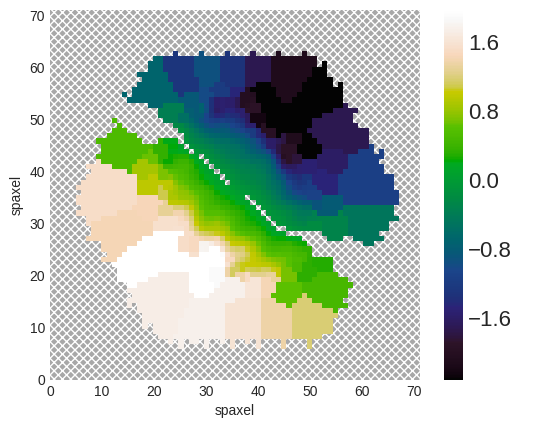

In [4]:
import marvin.utils.plot.map as mapplot
V_by_sigma = V/sigma
# V_by_sigma.value = V.value/sigma.value
# V_by_sigma.ivar = V.ivar/sigma.ivar
# V_by_sigma.mask = V.mask | sigma.mask
# V_by_sigma.property_name = 'V/sigma'
V_by_sigma.plot()

In [140]:
# print([i for i in V_by_sigma.value])         #    uncomment this to see the values of V_by_sigma

# <center> $\lambda\ $ calculation </center>
### <center> $\lambda_R = \frac{\Sigma_{i=0}^{N_{spx}}\ F_i R_i |V_i|}{ \Sigma_{i=0}^{N_{spx}}\ F_i R_i \sqrt{V_i^2 +\sigma_i^2} } $</center> 

In [10]:
a = F.value * R.value * abs(V.value)                                           # numerator part without the summation
b = F.value * R.value * np.sqrt(V.value**2 + sigma.value**2)                   # denominator part without the summation

# a = F*R*abs(V)
# b = F*R*np.sqrt(V.value**2 + sigma.value**2)
# print([i for i in b])
# b.plot()

In [11]:
numerator = np.sum(a)
denominator = np.sum(b)
print('Numerator is \t= ', numerator)
print('Denominator is \t= ',denominator)

Numerator is 	=  190107.92456623112
Denominator is 	=  296534.58370154945


In [15]:
lambda_R = numerator / denominator
print("lambda_R = ", lambda_R)

lambda_R =  0.6410986610505012


## <center> $V/\sigma\ $ Calculation for 100-200 galaxies</center>

In [71]:
data = pd.read_csv('result.csv')                            # data from Fraser-McKelivie's paper
plateifu_ = [i for i in data['plateifu'][0:100] ]     
plateifu_list = [i.strip(' ') for i in plateifu_]       # Contains a list of plateifu of 100 galaxies  
print(plateifu_list)                                  # Here .strip(' ') is used to remove extra space from plateifu: e.g. this makes '9192-12702 ' to '9192-12702'

['9192-12702', '8154-12705', '8157-12705', '8157-3704', '9514-12702', '9514-3701', '7993-9102', '7993-3701', '7993-12703', '9514-12705', '9514-6104', '7993-3704', '7993-12704', '9514-9102', '8157-1901', '9514-9101', '8157-3702', '7993-1902', '7993-9101', '7993-12702', '7993-6102', '7993-1901', '7993-6103', '9514-3704', '9514-12704', '9513-3703', '8157-6101', '8157-6103', '9513-6103', '9513-1902', '9513-9101', '9513-12703', '9195-12702', '9195-9102', '9195-6104', '9513-3702', '9195-3703', '8157-12703', '11867-1901', '11867-3702', '11867-12702', '11867-12704', '12511-6102', '10839-9101', '12511-3704', '11867-12703', '11867-3703', '10512-3704', '10512-6102', '12511-12702', '10839-12703', '10840-3704', '10512-6103', '10512-12701', '10512-3701', '10512-6101', '10512-12702', '10512-9101', '10512-1901', '10840-1902', '10840-6104', '10512-9102', '10842-3701', '10512-12704', '10512-12703', '10511-3701', '10511-3704', '10840-6101', '10511-12704', '10511-6102', '10511-6103', '10840-6102', '10840-

In [61]:
V_by_sigma_list = []                         # creating empty list to store V/sigma values of galaxies
lambda_R_list = []                           # creating empty list to store lambda_R values of galaxies
# lambda_R_list

In [62]:
for i in plateifu_list:
    maps = Maps(i)
    V = maps['stellar_vel']
    sigma = maps['stellar_sigma']
    F = maps['bin_mflux']
    R = maps['spx_ellcoo_elliptical_radius']
    
                                                                     # V/sigma
    
    A = F.value * (V.value)**2                                                     # numerator part without the summation
    B = F.value * (sigma.value**2)                                                 # denominator part without the summation
    Numerator = np.sum(A)
    Denominator = np.sum(B)
    V_by_sigma = np.sqrt(Numerator / Denominator)
    V_by_sigma_list.append(V_by_sigma)

                                                                    # lambda_R

    a = F.value * R.value * abs(V.value)                                           # numerator part without the summation
    b = F.value * R.value * np.sqrt(V.value**2 + sigma.value**2)                   # denominator part without the summation
    numerator = np.sum(a)
    denominator = np.sum(b)
    lambda_R = numerator / denominator
    lambda_R_list.append(lambda_R)

In [65]:
print("V/sigma = ", V_by_sigma_list)
print("\nlambda_R = ", lambda_R_list)

V/sigma =  [0.5040035520082988, 0.5278969170456179, 0.5973591505510156, 0.3712120736639185, 0.26268898408104896, 0.1394821317159227, 0.10060898133736433, 0.8572693215402009, 0.3907027558887058, 1.5009276090422188, 0.17023328652848735, 0.6786226330075202, 0.32794975924238945, 0.16651428381847147, 0.4459608428408972, 0.5493361581579862, 0.44722294078031755, 0.110543103296222, 0.336985536721355, 0.38671155131643764, 0.09334233026777614, 0.4882013759579138, 0.6012917284705918, 0.5756920547772956, 0.6482664659428081, 1.0671208585027423, 0.08551272468002, 1.0655989118253535, 0.3839066276133582, 0.3027686335198467, 0.7723685930717095, 0.10188347393796168, 1.3325039038353188, 0.07495781116016181, 0.7677102869204884, 0.20025087269308048, 0.36492737355572075, 0.6745460116938221, 0.5692028603470629, 0.7536526661382439, 0.2550126518774588, 0.18986563413079333, 0.1012334946378097, 0.3687236205585801, 0.1696156634607904, 1.1520896465926211, 0.6778430822560765, 0.18325834299135826, 0.5946254954861682

### Comparsion between FM's data and mine:

In [123]:
FM_V_by_sigma = [i for i in data['ObsVsig'][0:100]]
# FM_V_by_sigma = [i for i in data['PSFcorrVsig'][0:100]]
# FM_V_by_sigma = [i for i in data['VsigPSFcorrDeproj'][0:100]]
# FM_V_by_sigma

FM_lambda = [i for i in data['Obslr'][0:100]]
# FM_lambda = [i for i in data['lrPSFcorrDeproj'][0:100]]

In [124]:
print(""" plateifu \t\t\t    My V/sigma \t\t\t    FM V/sigma (ObsVsig) \t  My lambda_R \t\t\t   FM lambda_R (Obslr)""")
print('─' * 151)

for p, x, y, z, w in zip(plateifu_list, V_by_sigma_list, FM_V_by_sigma, lambda_R_list, FM_lambda):
    print(p, x, y, z, w, sep='\t\t\t')

 plateifu 			    My V/sigma 			    FM V/sigma (ObsVsig) 	  My lambda_R 			   FM lambda_R (Obslr)
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
9192-12702			0.5040035520082988			0.43298			0.47966259152246515			0.41829
8154-12705			0.5278969170456179			0.45107			0.48336206156426137			0.45167
8157-12705			0.5973591505510156			0.96422			0.5565237955369894			0.70447
8157-3704			0.3712120736639185			0.56394			0.3448184184073448			0.45131
9514-12702			0.26268898408104896			0.21059			0.22470488396214838			0.1994
9514-3701			0.1394821317159227			0.09176			0.1313131172944118			0.08799
7993-9102			0.10060898133736433			0.05876			0.10285131835125297			0.05204
7993-3701			0.8572693215402009			0.8523			0.6194408863400054			0.64149
7993-12703			0.3907027558887058			0.20532			0.34517566274577394			0.17912
9514-12705			1.5009276090422188			0.95403			0.8003227135118323			0.64177
9514-6104			0.170233